# Import Python Libraries

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
import pdb

# Load MNIST Datset

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float)
y_train = y_train.astype(np.float)
x_train = x_train/np.max(x_train)

In [5]:
print("dtype of x_train: {0}, dtype of y_train: {1}".format(x_train.dtype, y_train.dtype))
print("Max of x_train: {0}, Min of x_train: {1}".format(np.max(x_train), np.min(x_train)))

dtype of x_train: float64, dtype of y_train: float64
Max of x_train: 1.0, Min of x_train: 0.0


The first four images of x_train and their own labels are in the following:


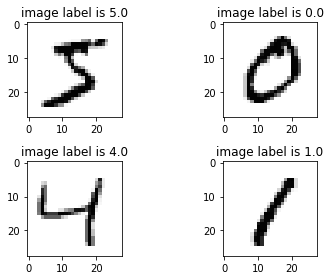

In [6]:
print("The first four images of x_train and their own labels are in the following:")
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.imshow(x_train[0], cmap='Greys',  interpolation='nearest')
ax1.set_title('image label is {}'.format(y_train[0]))
ax2.imshow(x_train[1], cmap='Greys',  interpolation='nearest')
ax2.set_title('image label is {}'.format(y_train[1]))
ax3.imshow(x_train[2], cmap='Greys',  interpolation='nearest')
ax3.set_title('image label is {}'.format(y_train[2]))
ax4.imshow(x_train[3], cmap='Greys',  interpolation='nearest')
ax4.set_title('image label is {}'.format(y_train[3]))
f.tight_layout()
plt.show()

# Discriminator


In [7]:
def Discriminator(input_shape):
    
    model = Sequential()
    
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), input_shape=input_shape,
              padding='valid', activation='relu'))
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
              activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid',
              activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid',
              activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    
    return model

In [8]:
D = Discriminator((28,28,1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
__________

# Generator

In [9]:
def Generator(input_shape):
    
    model = Sequential()

    model.add(Dense(7*7*64, input_shape=input_shape))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))
    model.add(Reshape((7, 7, 64)))

    model.add(UpSampling2D())
    model.add(Conv2DTranspose(filters=32, kernel_size=(3,3), padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))
    
    model.add(UpSampling2D())
    model.add(Conv2DTranspose(filters=16, kernel_size=(3,3), padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))
    
    model.add(Conv2DTranspose(filters=8, kernel_size=(3,3), padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))

    model.add(Conv2DTranspose(filters=1, kernel_size=(3,3), padding='same'))
    model.add(Activation('sigmoid'))
    model.summary()
        
    return model

In [10]:
G = Generator((100,))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_2 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
__________

# Discriminator Model

In [11]:
def discriminator_model(D):
    optimizer = RMSprop(lr=0.0002, decay=6e-8)
    DM = D
    for l in DM.layers:
        l.trainable = True
    DM.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    DM.summary()
    return DM

In [12]:
DM = discriminator_model(D)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
__________

# Adversarial Model

In [13]:
def adversarial_model(G, D):
    optimizer = RMSprop(lr=0.0001, decay=3e-8)
    AM = Sequential()
    AM.add(G)
    #D.trainable = False
    for l in D.layers:
        l.trainable = False
    AM.add(D)
    AM.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    AM.summary()
    return AM

In [14]:
AM = adversarial_model(G, D)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 28, 28, 1)         353825    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 99201     
Total params: 453,026
Trainable params: 347,441
Non-trainable params: 105,585
_________________________________________________________________


# Training

In [15]:
def train(train_steps=2000, batch_size=256, save_interval=0):
    G = Generator((100,))
    D = Discriminator((28,28,1))
    discriminator =  discriminator_model(D)
    adversarial = adversarial_model(G, D)
    noise_input = None
    if save_interval>0:
        noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
        
    for i in range(train_steps):
        images_train = x_train[np.random.randint(0, x_train.shape[0], size=batch_size), :, :, :]
        noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
        images_fake = G.predict(noise)
        x = np.concatenate((images_train, images_fake))
        y = np.ones([2*batch_size, 1])
        y[batch_size:, :] = 0
        d_loss = discriminator.train_on_batch(x, y)

        y = np.ones([batch_size, 1])
        noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
        a_loss = adversarial.train_on_batch(noise, y)
        log_mesg = "%d: [D loss: %f, acc: %f]" % (i, d_loss[0], d_loss[1])
        log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, a_loss[0], a_loss[1])
        print(log_mesg)
        if save_interval>0:
            if (i+1)%save_interval==0:
                plot_images(save2file=True, samples=noise_input.shape[0], noise=noise_input, step=(i+1), G=generator)

In [18]:
def plot_images(save2file=False, fake=True, samples=16, noise=None, step=0, G=Generator):
    filename = 'mnist.png'
    if fake:
        if noise is None:
            noise = np.random.uniform(-1.0, 1.0, size=[samples, 100])
        else:
            filename = "mnist_%d.png" % step
        images = G.predict(noise)
    else:
        i = np.random.randint(0, x_train.shape[0], samples)
        images = x_train[i, :, :, :]

    plt.figure(figsize=(10,10))
    for i in range(images.shape[0]):
        plt.subplot(4, 4, i+1)
        image = images[i, :, :]
        image = np.reshape(image, [28, 28])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    if save2file:
        plt.savefig(filename)
        plt.close('all')
    else:
        plt.show()

In [19]:
train()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_9 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_13 (Activation)   (None, 3136)              0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 14, 32)        128       
__________

IndexError: too many indices for array